In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


In [19]:
df = pd.read_csv('C:\\Users\\USER\\ArewaDS ML\\ArewaDS-Machine-Learning-Assignments\\week_6\\nigerian-songs.csv')
df

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4


In [20]:
df.info

<bound method DataFrame.info of                          name                         album  \
0                      Sparky            Mandy & The Jungle   
1                  shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                       LITT!                         LITT!   
3    Confident / Feeling Cool               Enjoy Your Life   
4                  wanted you                         rare.   
..                        ...                           ...   
525                   Kwaroro                       Kwaroro   
526             Concert Party                   Afro Escape   
527                      Loko                    Applaudise   
528                      Gift                    Applaudise   
529                    Macoma                    Applaudise   

                  artist artist_top_genre  release_date  length  popularity  \
0          Cruel Santino  alternative r&b          2019  144000          48   
1    Odunsi (The Engine)          afropop          20

In [21]:
df.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [22]:
df.describe()

,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,2015.390566,222298.169811,17.507547,0.741619,0.265412,0.760623,0.016305,0.147308,-4.953011,0.130748,116.487864,3.986792
std,3.131688,39696.822259,18.992212,0.117522,0.208342,0.148533,0.090321,0.123588,2.464186,0.092939,23.518601,0.333701
min,1998.000000,89488.000000,0.000000,0.255000,0.000665,0.111000,0.000000,0.028300,-19.362000,0.027800,61.695000,3.000000
25%,2014.000000,199305.000000,0.000000,0.681000,0.089525,0.669000,0.000000,0.075650,-6.298750,0.059100,102.961250,4.000000
50%,2016.000000,218509.000000,13.000000,0.761000,0.220500,0.784500,0.000004,0.103500,-4.558500,0.097950,112.714500,4.000000
75%,2017.000000,242098.500000,31.000000,0.829500,0.403000,0.875750,0.000234,0.164000,-3.331000,0.177000,125.039250,4.000000
max,2020.000000,511738.000000,73.000000,0.966000,0.954000,0.995000,0.910000,0.811000,0.582000,0.514000,206.007000,5.000000


Text(0.5, 1.0, 'Top genres')

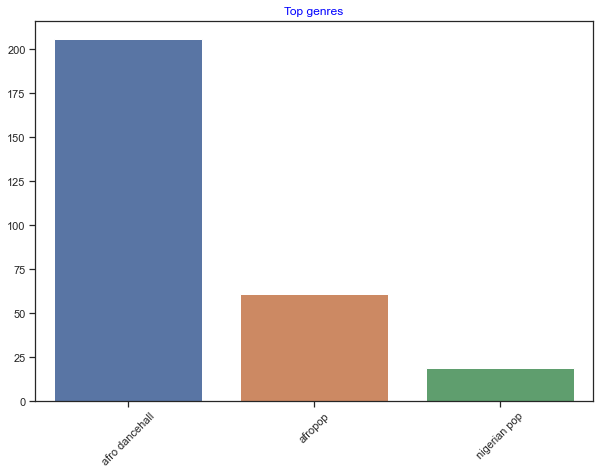

In [23]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

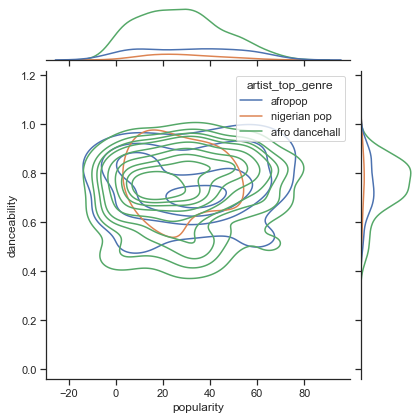

In [24]:
sns.set_theme(style = "ticks")

g = sns.jointplot(
    data =df, x="popularity", y ="danceability", hue ="artist_top_genre",
    kind ="kde"
)

c:\ml\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


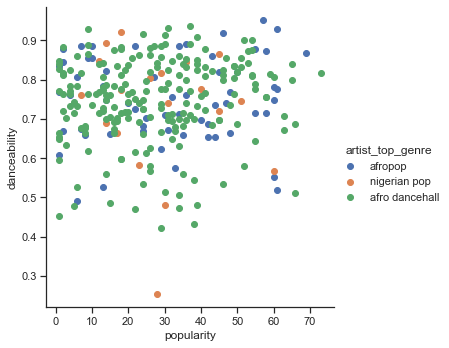

In [25]:
sns.FacetGrid(df, hue="artist_top_genre", size=5) \
   .map(plt.scatter, "popularity", "danceability") \
   .add_legend()

**let take a look at different way of visuazing clusters**

A dendrogram is a tree-like diagram that depicts the hierarchical clustering of data points. It has the potential to be useful in hierarchical clustering algorithms such as agglomerative clustering. Here's an illustration:

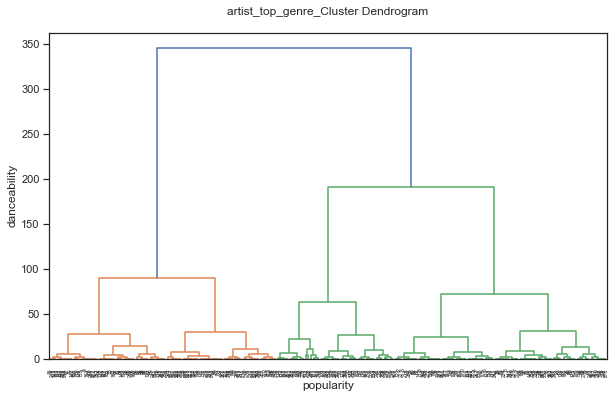

In [26]:
data = df[['popularity', 'danceability']] #extracting necessary columns from the data

#performing  hierarchical clustering and obatining the linkage matrix
linkage_matrix =linkage( data, method = 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('artist_top_genre_Cluster Dendrogram\n')
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()


A silhouette plot shows the silhouette coefficients of each data point, which are used to assess the quality of clustering. It aids in determining the compactness and separation of clusters. Here's an illustration:

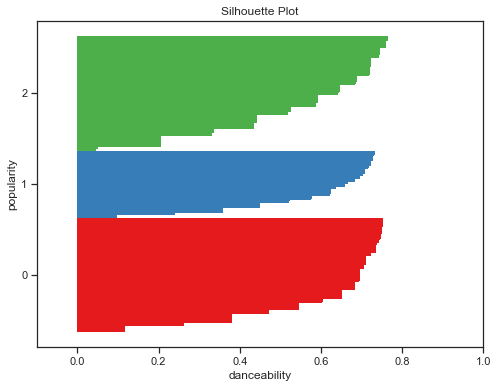

In [27]:
# Selecting the features for clustering
x = df["popularity"]
y = df["danceability"]

# Perform clustering
data = pd.concat([x, y], axis=1)
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(data)

# Compute silhouette scores for each data point
silhouette_vals = silhouette_samples(data, labels)

# Plot silhouette plot
fig, ax = plt.subplots(figsize=(8, 6))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster_label in enumerate(range(n_clusters)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster_label]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    color = sns.color_palette("Set1", n_colors=n_clusters)[i]
    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

ax.set_title('Silhouette Plot')
ax.set_xlabel('danceability')
ax.set_ylabel('popularity')
ax.set_yticks(y_ticks)
ax.set_yticklabels(range(n_clusters))
ax.set_xlim(-0.1, 1)
plt.show()
